In [1]:
import keras

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def encode(series):
    return pd.get_dummies(series.astype(str))

Using TensorFlow backend.


In [2]:
mfp_pred_orig = np.loadtxt('mfp_test2_pred.csv',delimiter=",")
mfp_act_orig = np.loadtxt('mfp_test2_act.csv',delimiter=",")
cnnr_model = keras.models.load_model('cnnr_iter1.h5')
cnnr_model.summary()
cnnc_model = keras.models.load_model('cnnc_iter3.h5')
cnnc_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 32, 32, 2)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 12)        228       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 12)        48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 108)         32508     
_______________________________________

In [3]:
#CNN Classification testing
#Import label data

temp_labels = np.loadtxt('vec_mat_clabels_icex_src_0.01train.csv',delimiter=",")
labels_t = []

for l in range(len(temp_labels)):
    labels_t.append(str(temp_labels[l]))

labels_t = np.array(labels_t)
labels_t = labels_t.ravel()

def encode(series):
    return pd.get_dummies(series.astype(str))

y_train = encode(labels_t)
labels = list(y_train.columns.values)
float_labels = [float(i) for i in labels_t]

#Import test data
features_test = np.loadtxt('vec_mat_features_icex_src_test2_norm.csv',delimiter=",")
temp_ytest = np.loadtxt('vec_mat_rlabels_icex_src_test2.csv',delimiter=",")
y_test= []

real_test = features_test[:,0::2]
imag_test = features_test[:,1::2]
X_test = np.zeros((features_test.shape[0],32,32,2))

for k in range(features_test.shape[0]):
    count = 0
    for i in range(32):
        for j in range(i,32):
            X_test[k,i,j,0] = real_test[k,count]
            X_test[k,i,j,1] = imag_test[k,count]
            
            if i!=j:
                X_test[k,j,i,0] = X_test[k,i,j,0]
                X_test[k,j,i,1] = -X_test[k,i,j,1]
            
            count = count + 1



temp_ytest = temp_ytest.ravel()
y_test = temp_ytest

predictions = cnnc_model.predict(X_test)

pred_labels = []
for i in np.argmax(predictions, axis=1):
    pred_labels.append(float(labels[i]))

#sort output for plotting
inds = y_test.argsort()
sorted_y_test = y_test[inds]

floaty_pred = np.array(pred_labels).astype(np.float)
sorted_y_pred = floaty_pred[inds]

#classification plotting
sorted_y_pred2c = np.array([float(numeric_string) for numeric_string in sorted_y_pred])
sorted_y_test2c = np.array([float(numeric_string) for numeric_string in sorted_y_test])

In [4]:
#CNN Regression Testing

features_test = np.loadtxt('vec_mat_features_icex_src_test2_norm.csv',delimiter=",")
temp_ytest = np.loadtxt('vec_mat_rlabels_icex_src_test2.csv',delimiter=",")
y_test= []

real_test = features_test[:,0::2]
imag_test = features_test[:,1::2]
X_test = np.zeros((features_test.shape[0],32,32,2))

for k in range(features_test.shape[0]):
    count = 0
    for i in range(32):
        for j in range(i,32):
            X_test[k,i,j,0] = real_test[k,count]
            X_test[k,i,j,1] = imag_test[k,count]
            
            if i!=j:
                X_test[k,j,i,0] = X_test[k,i,j,0]
                X_test[k,j,i,1] = -X_test[k,i,j,1]
            
            count = count + 1

temp_ytest = temp_ytest.ravel()
y_test = temp_ytest

predictions = cnnr_model.predict(X_test)

#sort output for plotting
inds = y_test.argsort()
sorted_y_test2r = y_test[inds]
sorted_y_pred2r = np.squeeze(predictions)[inds]

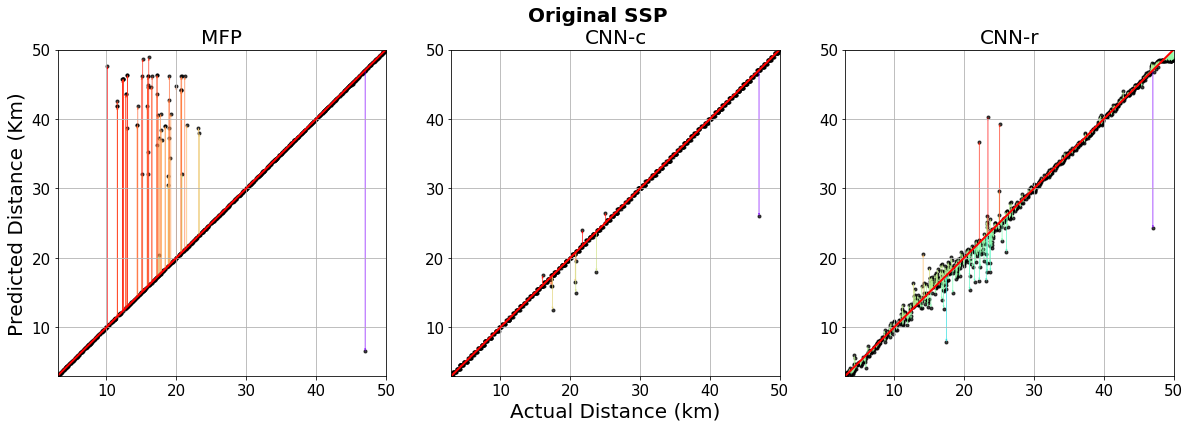

In [6]:
#Plotting
fig = plt.figure(figsize=(20,6))
fig.suptitle('Original SSP', fontsize=20, fontweight='bold')
fig.text(0.09, 0.5, 'Predicted Distance (Km)', fontsize=20,va='center', rotation='vertical')

plt.subplot(1,3,1)
colors = mfp_pred_orig-mfp_act_orig
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow
plt.scatter(mfp_act_orig,mfp_pred_orig,marker='.',c='k',alpha=0.75)
plt.plot(mfp_act_orig,mfp_act_orig,'r',linewidth = 2)
plt.quiver(mfp_act_orig, mfp_act_orig, np.zeros(len(mfp_act_orig)), mfp_pred_orig-mfp_act_orig,color=colormap(norm(colors)),angles='xy', scale_units='xy', scale=1.,width=0.002)
plt.axis([3, 50, 3, 50],fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylabel('Predicted Distance (Km)',fontsize=20)
#plt.xlabel('Actual Distance (Km)',fontsize=20)
plt.title('MFP',fontsize=20)
plt.grid()

plt.subplot(1,3,2)
colors = sorted_y_pred2c-sorted_y_test2c
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow
plt.scatter(sorted_y_test2c,sorted_y_pred2c,marker='.',c='k',alpha=0.75)
plt.plot(sorted_y_test2c,sorted_y_test2c,'r',linewidth = 2)
plt.quiver(sorted_y_test2c, sorted_y_test2c, np.zeros(len(sorted_y_test2c)), sorted_y_pred2c-sorted_y_test2c,color=colormap(norm(colors)),angles='xy', scale_units='xy', scale=1.,width=0.002)
plt.axis([3, 50, 3, 50],fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Actual Distance (km)',fontsize=20)
plt.title('CNN-c',fontsize=20)
plt.grid()

plt.subplot(1,3,3)
colors = sorted_y_pred2r-sorted_y_test2r
norm = Normalize()
norm.autoscale(colors)
colormap = cm.rainbow
plt.scatter(sorted_y_test2r,sorted_y_pred2r,marker='.',c='k',alpha=0.75)
plt.plot(sorted_y_test2r,sorted_y_test2r,'r',linewidth = 2)
plt.quiver(sorted_y_test2r, sorted_y_test2r, np.zeros(len(sorted_y_test2r)), sorted_y_pred2r-sorted_y_test2r,color=colormap(norm(colors)),angles='xy', scale_units='xy', scale=1.,width=0.002)
plt.axis([3, 50, 3, 50],fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.xlabel('Actual Distance (km)',fontsize=20)
plt.title('CNN-r',fontsize=20)
plt.grid()

plt.savefig('/Users/Rui/Desktop/origSSP_test.eps')

plt.show()